# Data Exploration

First order of business is to convert the .mat file to a format I can use in Python.

Subsequently, we explore the contents of the dataSubj10.mat file.

In [1]:
from os.path import join
import mat73
import matplotlib.pyplot as plt
import numpy as np
import mne

DataPath = join("neuro_data","dataSubj10.mat")
data_dict = mat73.loadmat(DataPath, use_attrdict=True)

In [2]:
events = data_dict["events"].astype(int)
print(events)


[[     13  167489]
 [     18  172031]
 [     11  176222]
 [     16  180305]
 [     18  184339]
 [     16  188880]
 [     18  192964]
 [     15  196964]
 [     11  201022]
 [     12  204980]
 [     12  208980]
 [     11  213013]
 [     11  217088]
 [     12  221088]
 [     16  225038]
 [     13  228997]
 [     15  233080]
 [     13  237038]
 [     15  240980]
 [     12  244963]
 [     18  249072]
 [     13  253196]
 [     15  257155]
 [     16  261130]
 [     21  276180]
 [     21  281205]
 [     25  285880]
 [     21  290513]
 [     21  295171]
 [     25  299729]
 [     25  305404]
 [     25  310046]
 [     25  314904]
 [     21  319638]
 [     21  324679]
 [     21  329621]
 [     21  334112]
 [     25  338754]
 [     25  343704]
 [     25  348321]
 [     21  354154]
 [     25  359004]
 [     25  363629]
 [     21  368554]
 [     25  374070]
 [     21  379629]
 [     21  384162]
 [     25  388937]
 [     11  547719]
 [     15  552244]
 [     16  556252]
 [     18  560336]
 [     13  5

In [2]:
print(data_dict.keys())
print(data_dict["data"].keys())
data = data_dict["data"]

dict_keys(['data', 'events'])
dict_keys(['cfg', 'elec', 'fsample', 'label', 'reject', 'sampleinfo', 'time', 'trial', 'trial_switched_side', 'trialinfo'])


In [4]:
data["cfg"] # Seemingly just matlab info, not important
data["elec"] # Positions of channels and electrodes etc
data["fsample"] # 500, sample frequency in Hz?
data["label"] # Electrode labels?
data["reject"] # [1, 5, 9]
data["sampleinfo"] # 2 col array of large ints
data["time"] # Large array of (seemingly identical?) arrays
data["trial"] # the actual time series data?
data["trial_switched_side"] # switched side meaning symmetrically opposite electrode?
data["trialinfo"] # Meta information for each trial

[[{'SubjectID': array(10.),
   'association': array(1.),
   'block': array(1.),
   'category_number': array(2.),
   'category_word': ['Blomma'],
   'exemplar_word': ['Tussilago'],
   'exp_part': array(1.),
   'item_acc': array(nan),
   'item_cat': array(3.),
   'mem_perf': array(nan),
   'round': array(nan),
   'side': array(1.),
   'side_accuracy': array(0.),
   'trial_nu_rp': array(1.),
   'trial_nu_tot': array(1.)}],
 [{'SubjectID': array(10.),
   'association': array(2.),
   'block': array(1.),
   'category_number': array(2.),
   'category_word': ['Blomma'],
   'exemplar_word': ['Iris'],
   'exp_part': array(1.),
   'item_acc': array(nan),
   'item_cat': array(8.),
   'mem_perf': array(nan),
   'round': array(nan),
   'side': array(2.),
   'side_accuracy': array(1.),
   'trial_nu_rp': array(2.),
   'trial_nu_tot': array(2.)}],
 [{'SubjectID': array(10.),
   'association': array(2.),
   'block': array(1.),
   'category_number': array(18.),
   'category_word': ['Dansstil'],
   'exemp

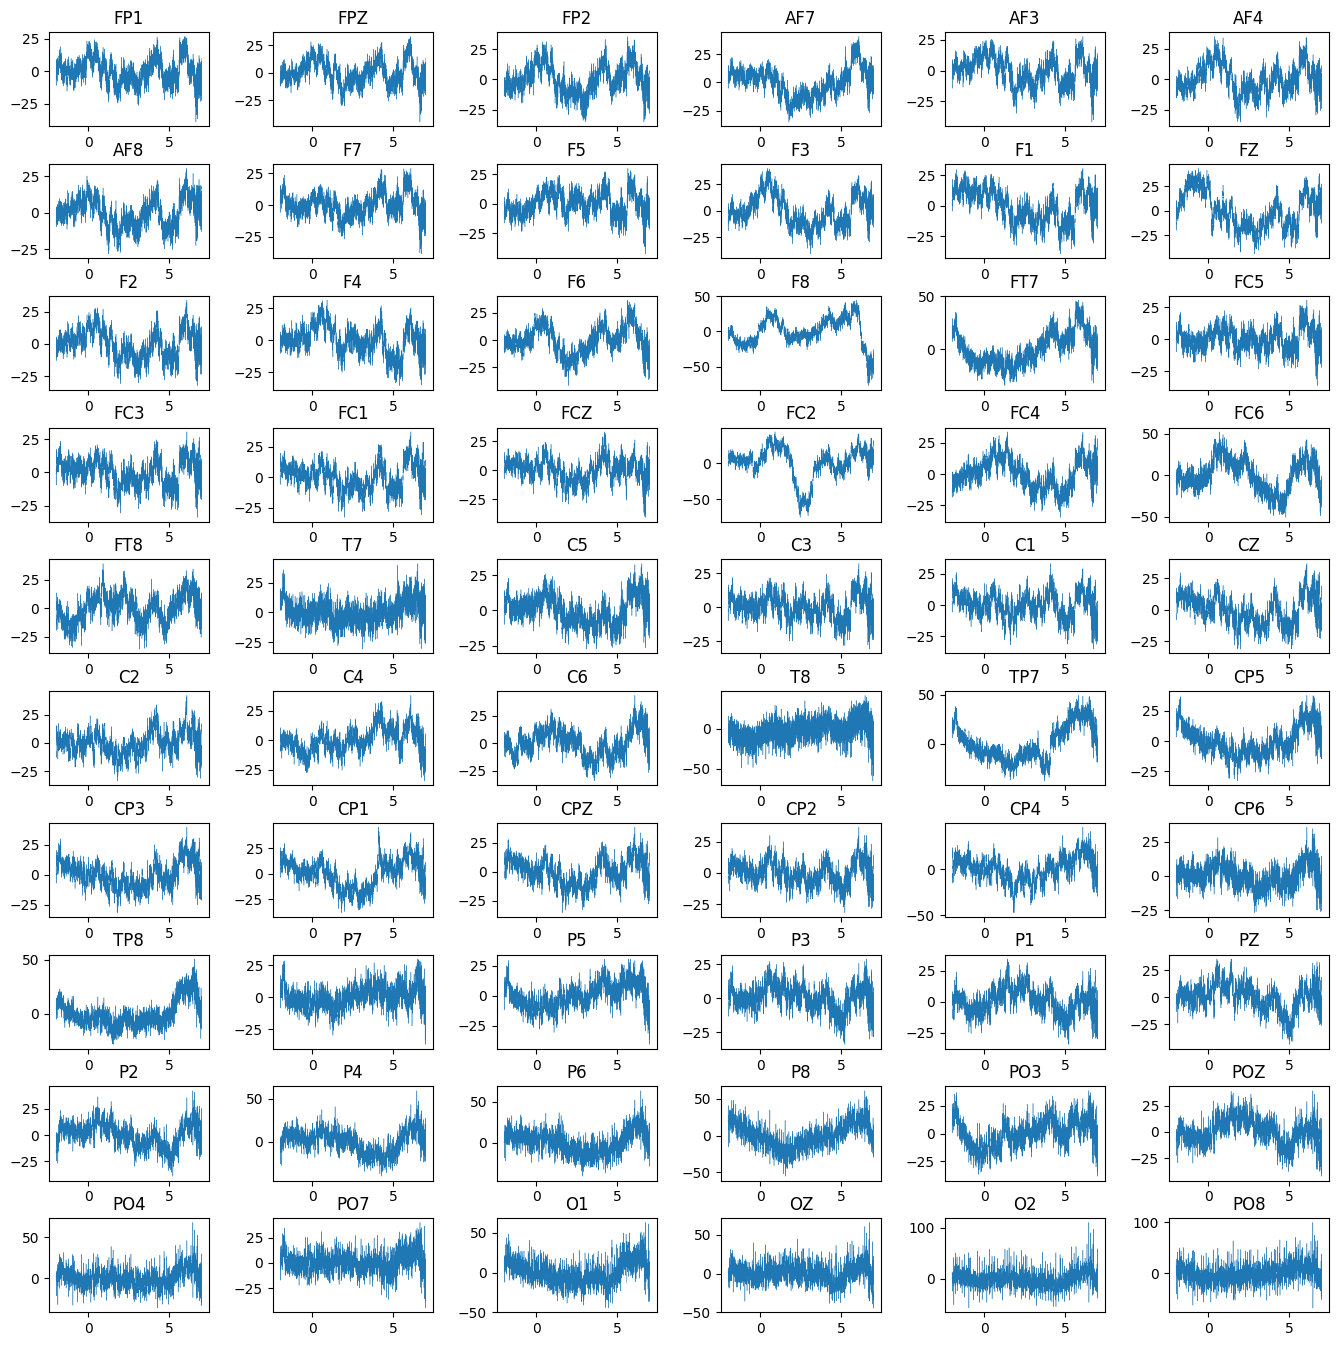

In [35]:
# Plot of data from very first electrode from first measurement in the "trial" data section
fig, ax = plt.subplots(10,6)
for i in range(60):
    ax[i//6][i%6].plot(data["time"][0],data["trial"][0][i],linewidth=0.3)
    ax[i//6][i%6].set_title(data["label"][i][0])
fig.set_size_inches(w=16,h=16)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


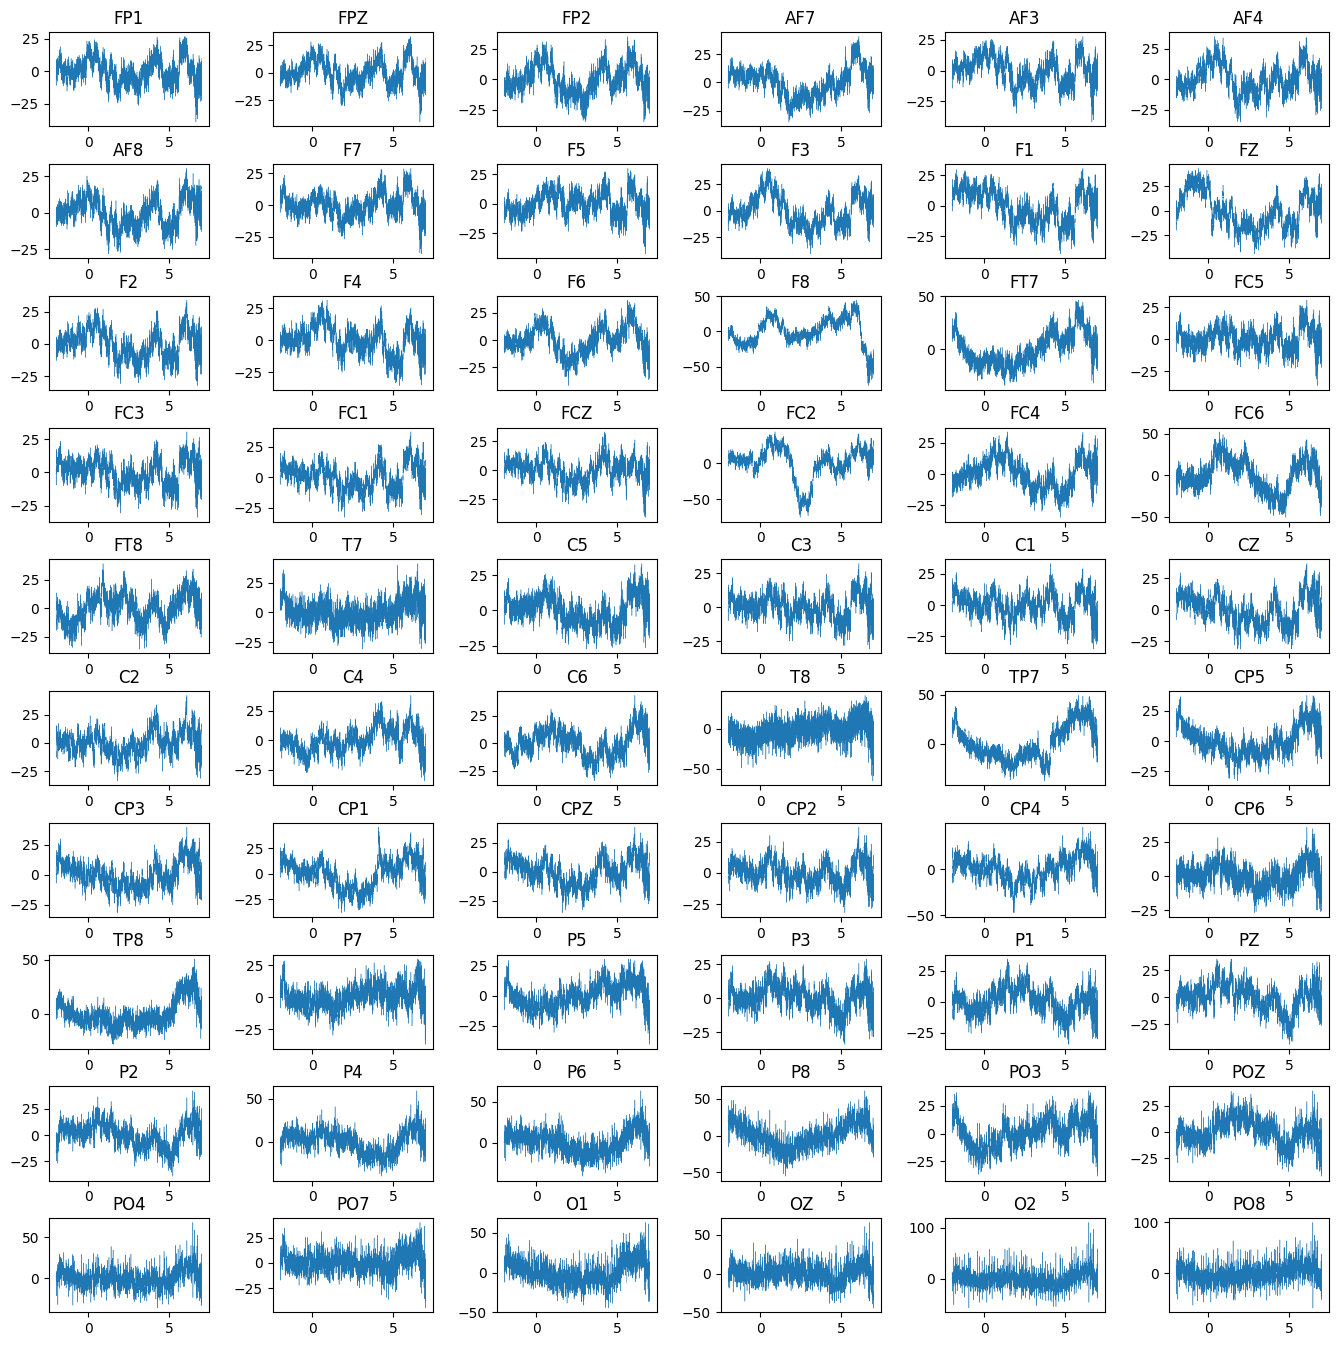

In [36]:
# Plot of data from very first electrode from first measurement in the "trial_switched_side" data section
fig, ax = plt.subplots(10,6)
for i in range(60):
    ax[i//6][i%6].plot(data["time"][0],data["trial_switched_side"][0][i],linewidth=0.3)
    ax[i//6][i%6].set_title(data["label"][i][0])
fig.set_size_inches(w=16,h=16)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)


The switched side looks identical, we check.

In [62]:
n = len(data["trial"])
for i in range(n):
    if not np.array_equal(data["trial_switched_side"][i],data["trial"][i]):
        print(i)

# Not all aare equal

28
29
30
31
36
37
38
40
41
43
46
66
67
71
72
73
74
78
80
82
83
85
110
111
114
115
117
119
121
122
124
127
129
130
155
156
158
160
163
166
168
169
170
171
174
176
201
205
206
207
209
210
213
215
218
219
220
223
249
251
252
256
257
259
260
261
263
267
283
284
288
289
291
292
293
294
298
300
301
302
328
331
332
333
337
338
340
343
346
347
349
350


Some spectrograms:

(0.0, 30.0)

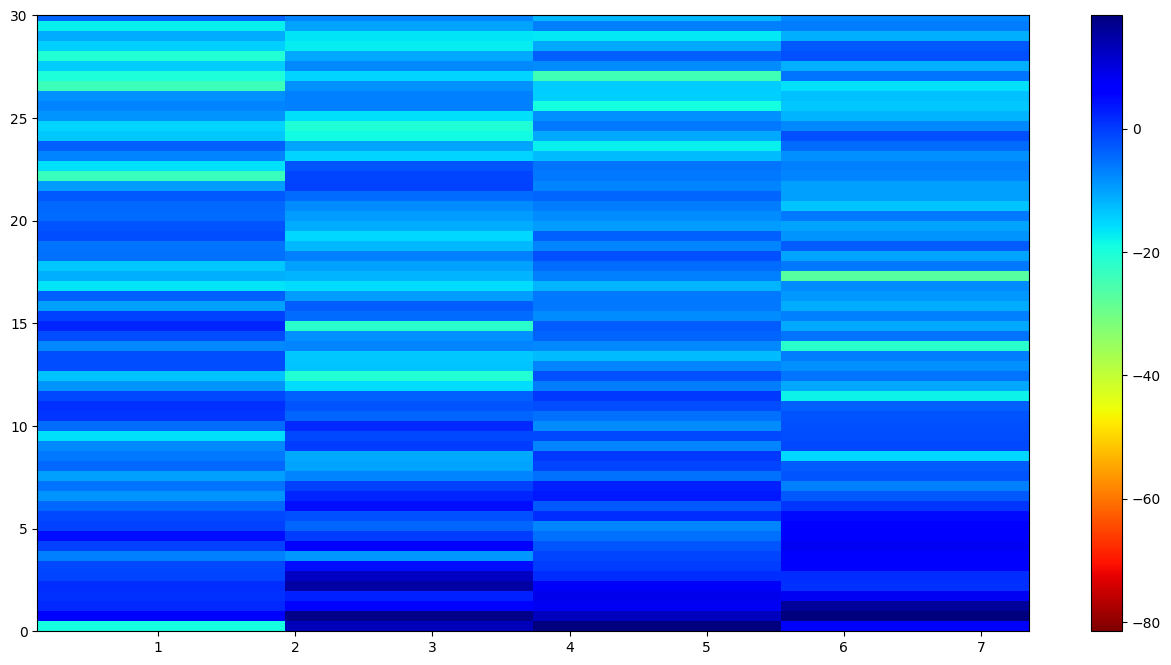

In [15]:
NFFT = 128*8
window2 = np.hamming(NFFT)
Fs = data["fsample"]
fig, ax = plt.subplots(1)
# Check week 6 for periodogram explanation
x1, x2, x3, mappable = ax.specgram(data["trial"][0][0],Fs=Fs,noverlap=120,NFFT=NFFT,cmap="jet_r", pad_to=NFFT, window = window2)
plt.colorbar(mappable, ax=ax)
#ax[1].psd(data["trial"][0][0],Fs=Fs,noverlap=120,NFFT=128)
fig.set_size_inches(16,8)
ax.set_ylim([0,30])
#ax[0].set_xlim([2,6])

Seemingly, evert frequency above 200Hz is completely irrelevant. And only below 20Hz is high prio.

Attempt bandpass filter, 1-50Hz

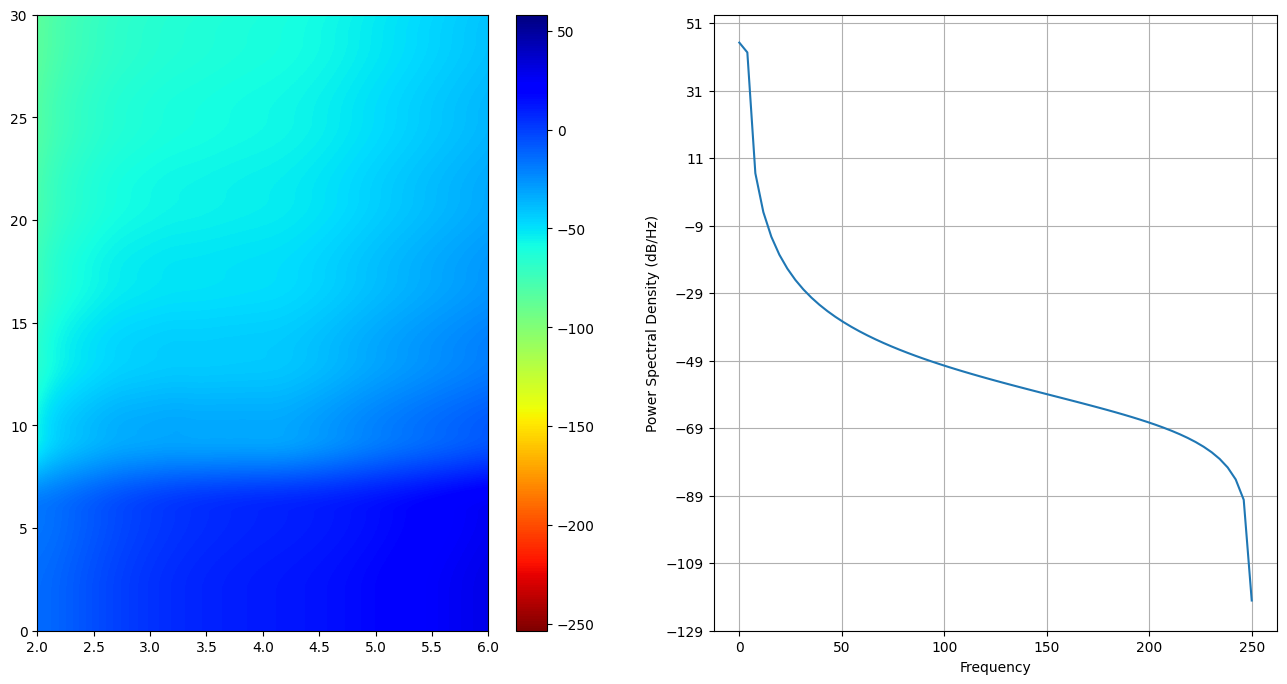

In [14]:
from scipy.signal import butter, lfilter

def butterworth_bandpass(data, lo, hi, fs, order=3):
    nyq = 0.5 * fs
    lowcut = lo / nyq
    highcut = hi / nyq
    b, a = butter(order, [lowcut, highcut], fs=fs, btype='band')
    return lfilter(b, a, data)

denoisedSample = butterworth_bandpass(data["trial"][0][0], 1, 50, Fs)

# Replot with denoised data example
fig, ax = plt.subplots(1,2)
x1, x2, x3, mappable = ax[0].specgram(denoisedSample,Fs=Fs,noverlap=120,NFFT=128,cmap="jet_r")
ax[0].set_ylim([0,30])
ax[0].set_xlim([2,6])
plt.colorbar(mappable, ax=ax[0])
ax[1].psd(denoisedSample,Fs=Fs,noverlap=120,NFFT=128)
fig.set_size_inches(16,8)

In [10]:
len(data["trial"][0][0])

4501